#Proyecto Final - Tercera Entrega

##Abstract

Debido a la alta tasa de suicidios que se generaron en los últimos años en Argentina, es importante visualizar y entender los hechos de muerte ocurridos en el año 2021. Por eso en este documento se presenta una propuesta para desarrollar un sistema de inteligencia artificial que permita, en base a diferentes funciones y métodos de estadística, detectar posibles etapas en la vida de las personas en las cuales pueden presentar indicios de atentar contra su salud y así favorecer la prevención de esto con diferentes tratamientos. Este sistema estará presente en los distintos centros de salud, rehabilitación e investigación, pudiéndose adecuar de manera automatizada a las poblaciones de cada provincia en Argentina; por lo que este proyecto tendrá gran relevancia para ampliar los conocimientos e investigaciones, ya que permitirá determinar si se sigue un patrón en el género, modalidad, horario y lugar del suicidio, y de esta forma poder contribuir a la detección temprana de tentativas de muerte.

##Objetivo

Deteccion de conducta suicida (ideación, intento y
suicidio) a través de un sistema integrado y eficiente de prevención, que tenga en cuenta la perspectiva de
género, modalidad, horario y lugar del suicidio en sus acciones y planteamientos.

##Dataset Suicidios en Argentina:

Base de datos que contabiliza el numero de suicidios en Argentina en el año 2021, estos suicidios se clasifican por provincia, departamento, edad, genero, modalidad, entre otros.

**Variables:**

*   id_hecho: identificador del suicidio

*   federal: hechos reportados o no

*   Cod_INDEC_Prov: codigo de la provincia donde ocurrio el hecho

*   provincia: provincia donde ocurrio el hecho

*   codigo_departamento:  codigo del departamento donde ocurrio el hecho

*   Cod_INDEC: código de 5 cifras para el departamento y la provincia

*   departamento:  departamento donde ocurrio el hecho

*   localidad: localidad donde ocurrio el hecho

*   codigo_localidad: codigo de la localidad del hecho

*   anio: año de ocurrencia del hecho

*   mes: mes de ocurrencia del hecho

*   fecha_hecho: fecha de ocurrencia del hecho

*   hora_hecho: hora del hecho

*   tipo_lugar: lugar de ocurrencia del hecho

*   modalidad: modalidad utilizada para llevar a cabo el acto

*   motivo_origen_registro: motivo que origina el registro del hecho

*   sexo_suicida: sexo del suicida

*   tr_edad_suicida: edad del suicida en tramos

##Lectura del Archivo (xlsx)

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=951fd457e42201582493a689e3abe3951dc1190666a2c5ece8aa7e68499c540a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
   

In [2]:
# Importando librerías completas
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import json
import requests
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from scipy import stats
from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score

# Importando un módulo (subcarpeta) de la librería
import matplotlib.pyplot as plt

In [3]:
pd.options.display.max_columns = None

In [4]:
from google.colab import drive

In [5]:
# Conectando Colab con Google Drive
drive.mount("mi_carpeta")

Mounted at mi_carpeta


In [7]:
# Comando de sistema (consola) para comprobar
%cd /content/mi_carpeta/MyDrive/Coderhouse/Data Science/Proyecto Final/Primera Entrega

/content/mi_carpeta/MyDrive/Coderhouse/Data Science/Proyecto Final/Primera Entrega


In [8]:
# Comando de sistema para comprobar
%ls

PrimeraEntregaCoronel.ipynb  suicidios_argentina_2021.xlsx


In [9]:
# Creando un DataFrame de Pandas con datos cargados de un archivo excel
df_suicidios = pd.read_excel('suicidios_argentina_2021.xlsx')

In [10]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 10)
df_suicidios

,id_hecho,federal,Cod_INDEC_Prov,provincia,codigo_departamento,Cod_INDEC,departamento,localidad,codigo_localidad,anio,mes,fecha_hecho,hora_hecho,tipo_lugar,modalidad,motivo_origen_registro,sexo_suicida,tr_edad_suicida
0,24971,No,54,MISIONES,63,54063,Iguazú,Puerto Iguazú,30,2021,1,2021-01-10,14:00:00,Otro Lugar ( Especificar ),Ahorcamiento,Intervención policial,Masculino,33
1,25004,No,54,MISIONES,63,54063,Iguazú,Puerto Iguazú,30,2021,1,2021-01-20,12:20:00,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,27
2,25014,No,54,MISIONES,77,54077,Libertador Grl. San Martín,Puerto Rico,60,2021,1,2021-01-18,23:30:00,Domicilio particular,Sin determinar,Intervención policial,Masculino,32
3,25051,No,50,MENDOZA,35,50035,Junín,La Colonia,30,2021,1,2021-01-01,11:23:00,Domicilio particular,Ahorcamiento,Denuncia particular,Femenino,23
4,25052,No,50,MENDOZA,21,50021,Godoy Cruz,Godoy Cruz,10,2021,1,2021-01-01,20:32:00,Domicilio particular,Ahorcamiento,Denuncia particular,Femenino,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,33403,No,2,CIUDAD DE BUENOS AIRES,12,2012,Comuna 12,Ciudad de Buenos Aires,10,2021,6,2021-06-27,11:19:00,Otro Lugar ( Especificar ),Ahorcamiento,Intervención policial,Masculino,25
3645,33202,No,2,CIUDAD DE BUENOS AIRES,12,2012,Comuna 12,Ciudad de Buenos Aires,10,2021,8,2021-08-07,11:11:11,Domicilio particular,Se arroja al vacío,Intervención policial,Femenino,26
3646,33509,No,6,BUENOS AIRES,357,6357,General Pueyrredón,Mar del Plata,110,2021,7,2021-07-01,03:30:00,Vía pública,Otra modalidad,Intervención policial,Masculino,21
3647,33510,No,6,BUENOS AIRES,791,6791,Tandil,Tandil,50,2021,7,2021-07-01,02:00:00,Domicilio particular,Ahorcamiento,Denuncia particular,Masculino,22


##Data StoryTelling

###Graficos con Matplotlib

####- Grafico de Suicidios por Provincia

####Preguntas

*   ¿Cual es la relación entre el número de suicidios y las provincias?

####Hipotesis

*   H0: La mayor cantidad de suicidios se produce en la provincia de Cordoba
*   H1: La mayor cantidad de suicidios se produce en la provincia de Buenos Aires

In [11]:
df_suicidios_provincia = df_suicidios.groupby(['provincia']).agg({'id_hecho': "count"}).reset_index()
df_suicidios_provincia.rename(columns = {'id_hecho':'Total Suicidios', 'provincia':'Provincia'}, inplace = True)
df_suicidios_provincia = df_suicidios_provincia.sort_values(by='Total Suicidios', ascending=False)
df_suicidios_provincia

,Provincia,Total Suicidios
0,BUENOS AIRES,1062
20,SANTA FE,321
5,CORDOBA,276
4,CIUDAD DE BUENOS AIRES,236
7,ENTRE RIOS,216
12,MENDOZA,197
16,SALTA,178
23,TUCUMÁN,172
2,CHACO,105
21,SANTIAGO DEL ESTERO,98


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'BUENOS AIRES'),
  Text(1, 0, 'SANTA FE'),
  Text(2, 0, 'CORDOBA'),
  Text(3, 0, 'CIUDAD DE BUENOS AIRES'),
  Text(4, 0, 'ENTRE RIOS'),
  Text(5, 0, 'MENDOZA'),
  Text(6, 0, 'SALTA'),
  Text(7, 0, 'TUCUMÁN'),
  Text(8, 0, 'CHACO'),
  Text(9, 0, 'SANTIAGO DEL ESTERO'),
  Text(10, 0, 'MISIONES'),
  Text(11, 0, 'SAN JUAN'),
  Text(12, 0, 'CORRIENTES'),
  Text(13, 0, 'SAN LUIS'),
  Text(14, 0, 'NEUQUEN'),
  Text(15, 0, 'CHUBUT'),
  Text(16, 0, 'RIO NEGRO'),
  Text(17, 0, 'JUJUY'),
  Text(18, 0, 'FORMOSA'),
  Text(19, 0, 'LA RIOJA'),
  Text(20, 0, 'SANTA CRUZ'),
  Text(21, 0, 'CATAMARCA'),
  Text(22, 0, 'LA PAMPA'),
  Text(23, 0, 'TIERRA DEL FUEGO')])

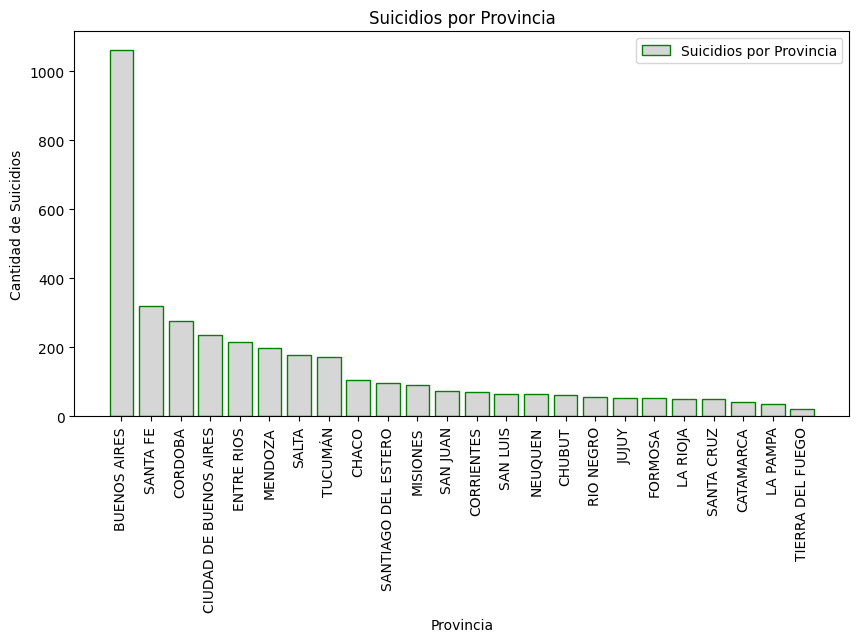

In [12]:
# Grafico con Matplotlib de Suicidios por Provincia
plt.figure(figsize=(10,5))
plt.bar(df_suicidios_provincia['Provincia'], df_suicidios_provincia['Total Suicidios'], label='Suicidios por Provincia', color=(0.2, 0.2, 0.2, 0.2),  edgecolor='green')
plt.title('Suicidios por Provincia')
plt.ylabel('Cantidad de Suicidios')
plt.xlabel('Provincia')
plt.legend()
plt.xticks(rotation=90)

####Conclusiones


*   En el gráfico "Suicidios por Provincia" se observa que la provincia de Buenos Aires es la que presenta mayor número de suicidios, mientras que la provincia con menor número de suicidios es Tierra del Fuego

####Recomendaciones
*   Darle una mayor atencion a las provincias con mas poblacion sin descuidar las otras para un mejor apoyo a la salud publica con respecto a los intentos de suicidio

###Analisis Univariado

In [13]:
# Obteniendo estadísticos descriptivos
stats.describe(df_suicidios_provincia["Total Suicidios"])

DescribeResult(nobs=24, minmax=(21, 1062), mean=152.04166666666666, variance=44505.085144927536, skewness=3.535872535560523, kurtosis=12.762476891328602)

In [14]:
# Calculando media geométrica
stats.gmean(df_suicidios_provincia["Total Suicidios"])

96.75165317844616

In [15]:
# Calculando la media recortada
stats.trim_mean(df_suicidios_provincia["Total Suicidios"], 0.1)

110.5

In [16]:
# Calculando coeficiente de variación
stats.variation(df_suicidios_provincia["Total Suicidios"])

1.3583149904560483

In [17]:
# Calculando rango interquartil
stats.iqr(df_suicidios_provincia["Total Suicidios"])

130.75

In [18]:
# Calculando asimetría
stats.skew(df_suicidios_provincia["Total Suicidios"])

3.535872535560523

In [19]:
# Calculando la kurtosis
stats.kurtosis(df_suicidios_provincia["Total Suicidios"])

12.762476891328602

<ipython-input-20-3e92f51159fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_suicidios_provincia["Total Suicidios"], kde=True, bins=10, color='g')


<Axes: xlabel='Total Suicidios', ylabel='Density'>

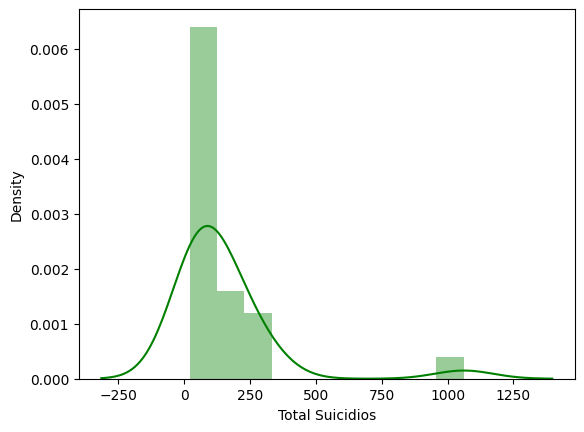

In [20]:
# Graficando distribución de la variable
sns.distplot(df_suicidios_provincia["Total Suicidios"], kde=True, bins=10, color='g')

--------------------------------------------------------------------------------

####- Grafico de Suicidios por Lugar del Hecho

####Preguntas

*   ¿Según la cantidad de suicidios, cual es el lugar mas frecuente en donde ocurre el hecho?

####Hipotesis

*   H0: La mayor cantidad de suicidios se realizan en la carcel
*   H1: La mayor cantidad de suicidios se realizan en el domicilio particular de la victima

In [21]:
df_suicidios_lugar = df_suicidios.groupby(['tipo_lugar']).agg({'id_hecho': "count"}).reset_index()
df_suicidios_lugar.rename(columns = {'id_hecho':'Total Suicidios', 'tipo_lugar':'Lugar'}, inplace = True)
df_suicidios_lugar = df_suicidios_lugar.sort_values(by='Total Suicidios', ascending=False)
df_suicidios_lugar

,Lugar,Total Suicidios
1,Domicilio particular,2693
4,Vía pública,386
3,Sin determinar,260
2,Otro Lugar ( Especificar ),224
5,Vías del FF.CC.,46
0,Cárcel o comisaría,40


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Domicilio particular'),
  Text(1, 0, 'Vía pública'),
  Text(2, 0, 'Sin determinar'),
  Text(3, 0, 'Otro Lugar ( Especificar )'),
  Text(4, 0, 'Vías del FF.CC.'),
  Text(5, 0, 'Cárcel o comisaría')])

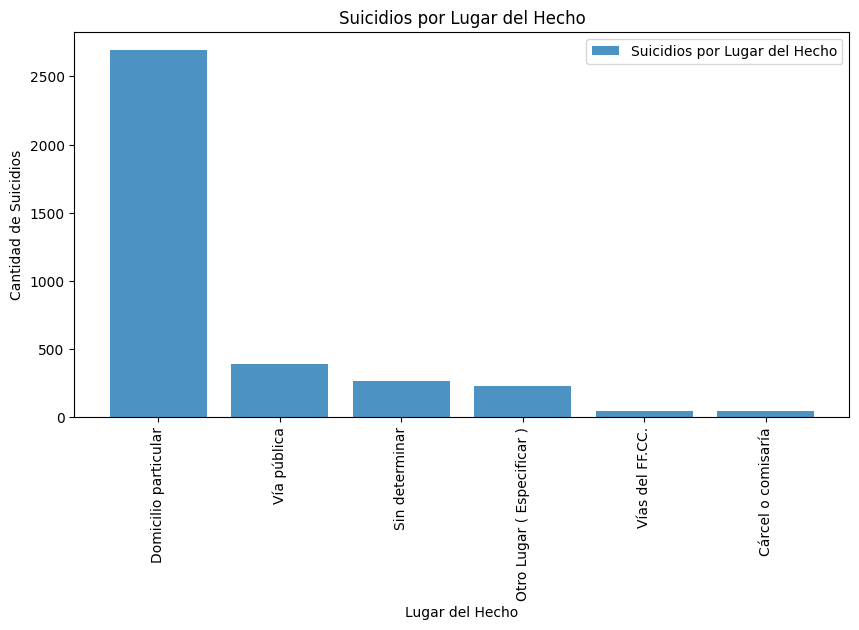

In [22]:
# Grafico con Matplotlib de Suicidios por Lugar del Hecho
plt.figure(figsize=(10,5))
plt.bar(df_suicidios_lugar['Lugar'], df_suicidios_lugar['Total Suicidios'], label='Suicidios por Lugar del Hecho', alpha=0.8)
plt.title('Suicidios por Lugar del Hecho')
plt.ylabel('Cantidad de Suicidios')
plt.xlabel('Lugar del Hecho')
plt.legend()
plt.xticks(rotation=90)

####Conclusiones



*   Analizando el gráfico de cantidad de suicidios en base al lugar del hecho, se observa que la gran mayoría ocurre en el domicilio particular, mientras que en la cárcel o comisaría es el lugar menos frecuente a que esto ocurra

####Recomendaciones
*   Garantizar una presencia en el hogar, buena comunicacion familiar y de no ser asi busqueda de ayuda externa para evitar cualquier tipo de caso de suicidio ya que en el domicilio particular es donde mas ocurren

###Analisis Univariado

In [23]:
# Obteniendo estadísticos descriptivos
stats.describe(df_suicidios_lugar["Total Suicidios"])

DescribeResult(nobs=6, minmax=(40, 2693), mean=608.1666666666666, variance=1060707.3666666667, skewness=1.7229129663637546, kurtosis=1.0818381562178931)

In [24]:
# Calculando media geométrica
stats.gmean(df_suicidios_lugar["Total Suicidios"])

219.3531158916842

In [25]:
# Calculando la media recortada
stats.trim_mean(df_suicidios_lugar["Total Suicidios"], 0.1)

608.1666666666666

In [26]:
# Calculando coeficiente de variación
stats.variation(df_suicidios_lugar["Total Suicidios"])

1.545911245935906

In [27]:
# Calculando rango interquartil
stats.iqr(df_suicidios_lugar["Total Suicidios"])

264.0

In [28]:
# Calculando asimetría
stats.skew(df_suicidios_lugar["Total Suicidios"])

1.7229129663637546

In [29]:
# Calculando la kurtosis
stats.kurtosis(df_suicidios_lugar["Total Suicidios"])

1.0818381562178931

<ipython-input-30-b94748fd36a0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_suicidios_lugar["Total Suicidios"], kde=True, bins=10)


<Axes: xlabel='Total Suicidios', ylabel='Density'>

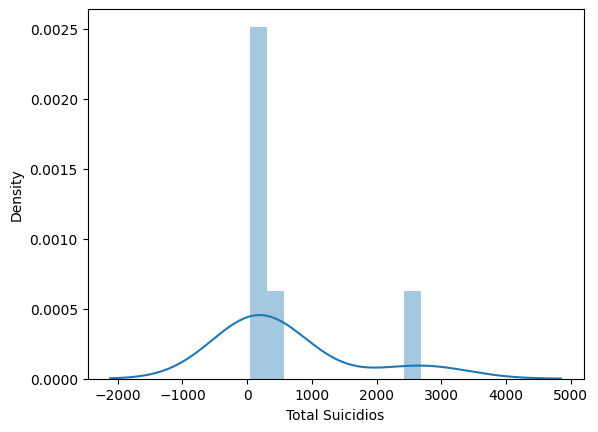

In [30]:
# Graficando distribución de la variable
sns.distplot(df_suicidios_lugar["Total Suicidios"], kde=True, bins=10)

--------------------------------------------------------------------------------

####- Grafico de Suicidios por Modalidad

####Preguntas

*   ¿Varia mucho la cantidad de suicidios en base a la modalidad empleada?

####Hipotesis

*   H0: El mayor numero de suicidios es mediante envenenamiento
*   H1: El mayor numero de suicidios es mediante ahorcamiento

In [31]:
df_suicidios_modalidad = df_suicidios.groupby(['modalidad']).agg({'id_hecho': "count"}).reset_index()
df_suicidios_modalidad.rename(columns = {'id_hecho':'Total Suicidios', 'modalidad':'Modalidad'}, inplace = True)
df_suicidios_modalidad = df_suicidios_modalidad.sort_values(by='Total Suicidios', ascending=False)
df_suicidios_modalidad

,Modalidad,Total Suicidios
0,Ahorcamiento,2406
2,Arma de fuego,546
8,Sin determinar,327
6,Se arroja al vacío,130
3,Envenenamiento,88
5,Se arroja a las vías de FF.CC.,48
1,Arma blanca / elemento cortante,45
9,Sumersión en piscina / mar / río,27
7,Se incinera,23
4,Otra modalidad,9


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ahorcamiento'),
  Text(1, 0, 'Arma de fuego'),
  Text(2, 0, 'Sin determinar'),
  Text(3, 0, 'Se arroja al vacío'),
  Text(4, 0, 'Envenenamiento'),
  Text(5, 0, 'Se arroja a las vías de FF.CC.'),
  Text(6, 0, 'Arma blanca /  elemento cortante'),
  Text(7, 0, 'Sumersión en piscina / mar / río'),
  Text(8, 0, 'Se incinera'),
  Text(9, 0, 'Otra modalidad')])

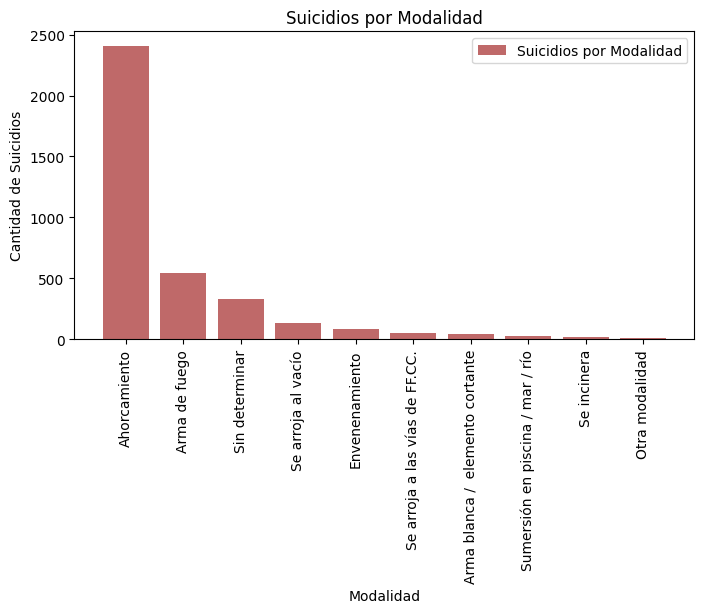

In [32]:
# Grafico con Matplotlib de Suicidios por Modalidad
plt.figure(figsize=(8,4))
plt.bar(df_suicidios_modalidad['Modalidad'], df_suicidios_modalidad['Total Suicidios'], label='Suicidios por Modalidad', color="brown", alpha=0.7)
# Argumento c modifica el color
# Argumento alpha modifica la transparencia de los puntos
plt.title('Suicidios por Modalidad')
plt.ylabel('Cantidad de Suicidios')
plt.xlabel('Modalidad')
plt.legend()
plt.xticks(rotation=90)

####Conclusiones



*   En el gráfico de cantidad de suicidios en base a la modalidad del hecho, se puede observar que la gran mayoría termina con su vida por ahorcamiento,  y es mucho menos frecuente que un suicidio se lleve a cabo con arma blanca, arrojándose a las vías del tren, sumersion, incineración u otra modalidad

####Recomendaciones
*   Vigilancia, seguimiento y evitar accesos a cualquier tipo de estos medios letales

###Analisis Univariado

In [33]:
# Obteniendo estadísticos descriptivos
stats.describe(df_suicidios_modalidad["Total Suicidios"])

DescribeResult(nobs=10, minmax=(9, 2406), mean=364.9, variance=543630.3222222221, skewness=2.4214375655677336, kurtosis=4.281068846869693)

In [34]:
# Calculando media geométrica
stats.gmean(df_suicidios_modalidad["Total Suicidios"])

94.91284474811995

In [35]:
# Calculando la media recortada
stats.trim_mean(df_suicidios_modalidad["Total Suicidios"], 0.1)

154.25

In [36]:
# Calculando coeficiente de variación
stats.variation(df_suicidios_modalidad["Total Suicidios"])

1.9168989857981447

In [37]:
# Calculando rango interquartil
stats.iqr(df_suicidios_modalidad["Total Suicidios"])

246.25

In [38]:
# Calculando asimetría
stats.skew(df_suicidios_modalidad["Total Suicidios"])

2.4214375655677336

In [39]:
# Calculando la kurtosis
stats.kurtosis(df_suicidios_modalidad["Total Suicidios"])

4.281068846869693

<ipython-input-40-9275e72574e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_suicidios_modalidad["Total Suicidios"], kde=True, bins=10, color='brown')


<Axes: xlabel='Total Suicidios', ylabel='Density'>

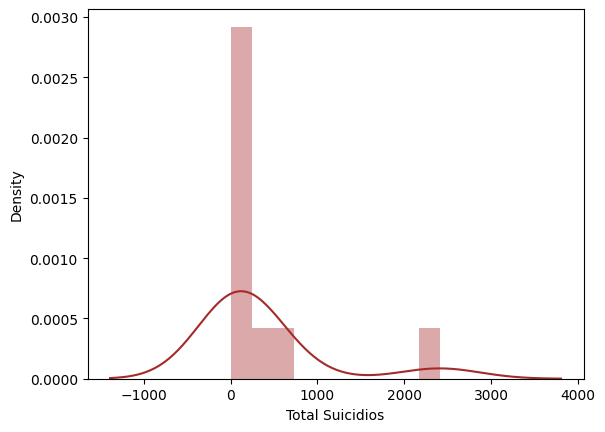

In [40]:
# Graficando distribución de la variable
sns.distplot(df_suicidios_modalidad["Total Suicidios"], kde=True, bins=10, color='brown')

--------------------------------------------------------------------------------

###Graficos con Seaborn

####- Grafico de Suicidios por Mes

####Preguntas

*   ¿Cual es el mes del año 2021, en el que ocurrieron más suicidios?

####Hipotesis

*   H0: En Abril hay mas cantidad de suicidios
*   H1: En Diciembre hay mas cantidad de suicidios

Text(0.5, 1.0, 'Suicidios por Mes')

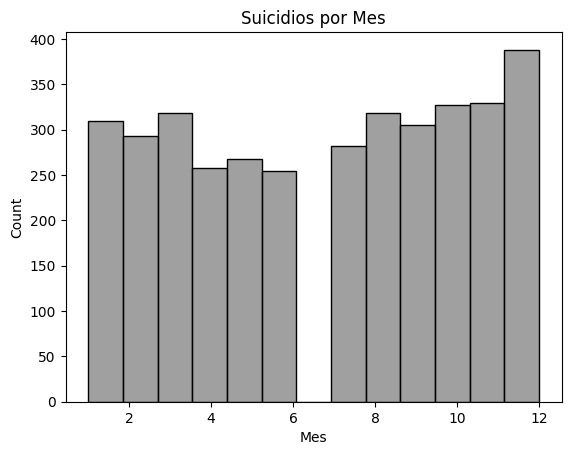

In [41]:
# Grafico de Suicidios por Mes
df_suicidios.rename(columns = {'mes':'Mes', 'sexo_suicida':'Sexo', 'tr_edad_suicida':'Edad', 'motivo_origen_registro':'Motivo del Registro'}, inplace = True)
ax=sns.histplot(data=df_suicidios, x="Mes", color="grey")
ax.set_title("Suicidios por Mes")

####Conclusiones



*   En el gráfico de cantidad de suicidios respecto al mes del año en el que ocurre, se observa que diciembre es el mes de mayor casos de suicidio; aunque no hay una marcada variación con respecto a los otros meses

####Recomendaciones
*   Mayor atencion en los meses con mas cantidades de suicidios teniendo en cuenta que es una variable muy inestable ya que una persona puede intentarlo en cualquier momento

--------------------------------------------------------------------------------

####- Grafico de Cantidad de Suicidios por Mes en base al Sexo

####Preguntas

*   ¿Según el género, en que mes del año ocurren la mayoría de los suicidios? Y entre las tres categorías (sexo masculino, femenino y sin determinar), donde se observa el mayor número de casos de suicidios?

####Hipotesis

*   H0: Se presenta mayor numero de suicidios en el genero femenino
*   H1: Se presenta mayor numero de suicidios en el genero masculino

Text(0.5, 0.98, 'Cantidad de Suicidios por Mes para cada Sexo')

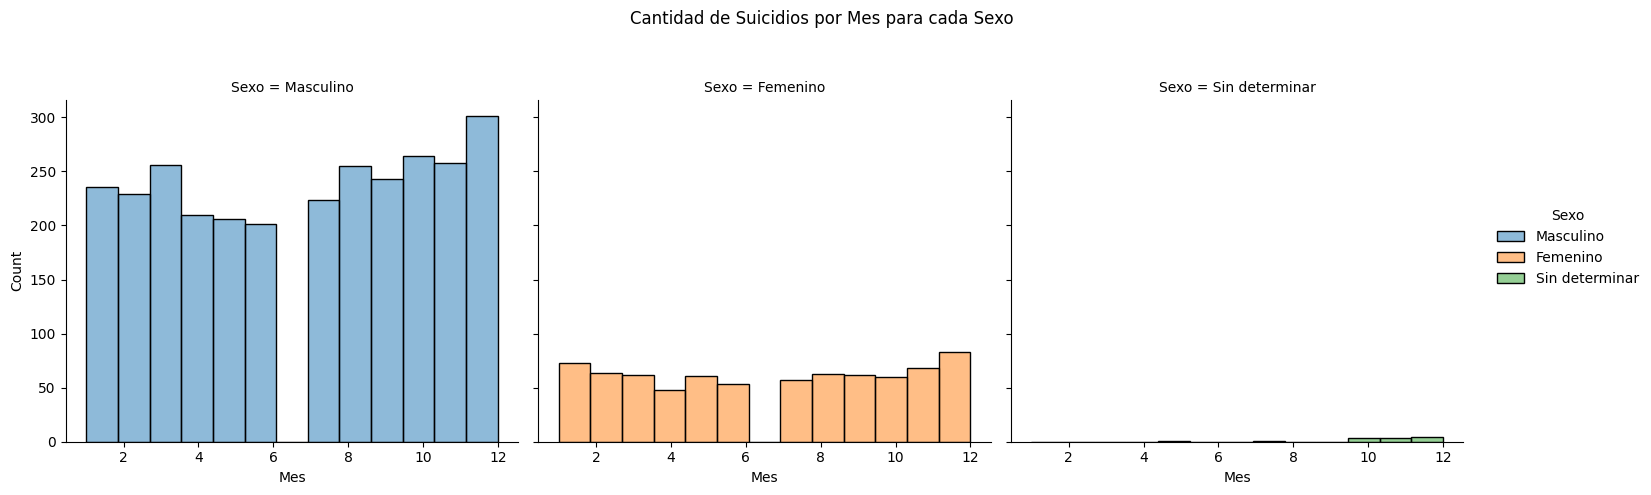

In [42]:
# Grafico de Cantidad de Suicidios por Mes en base al Sexo
ax=sns.displot(data=df_suicidios, x="Mes", hue="Sexo", col="Sexo")
ax.fig.subplots_adjust(top = 0.8)
ax.fig.suptitle("Cantidad de Suicidios por Mes para cada Sexo")

####Conclusiones



*   En el gráfico de cantidad de suicidios en base al mes para cada sexo, se puede ver que en el mes de diciembre se llevan a cabo mas suicidios, tanto en el género masculino, femenino como en el sin determinar.
Además también se puede determinar que la mayor cantidad de suicidios ocurre en la población masculina

####Recomendaciones
*    Teniendo en cuenta que la mayor cantidad de suicidios se encuentra en el genero masculino, hay que realizar diferentes trabajos a la hora de acompañar a las hombres ya que muchas veces por estereotipos o prejuicios de la sociedad esconden o reprimen sus emociones a la hora de hablar o pedir ayuda

--------------------------------------------------------------------------------

####- Grafico de Cantidad de Suicidios por Edad

####Preguntas

*   ¿Como varia el número de suicidios con respecto a la edad?

####Hipotesis

*   H0: Hay una mayor cantidad de suicidios entre los 30 y 35 años
*   H1: Hay una mayor cantidad de suicidios entre los 25 y 27 años

In [43]:
df_suicidios_edad = df_suicidios.groupby(['Edad']).agg({'id_hecho': "count"}).reset_index()
df_suicidios_edad.rename(columns = {'id_hecho':'Total Suicidios', 'tr_edad_suicida':'Edad'}, inplace = True)
df_suicidios_edad = df_suicidios_edad.sort_values(by='Total Suicidios', ascending=False)
df_suicidios_edad

,Edad,Total Suicidios
11,27,325
8,24,290
7,23,280
10,26,264
9,25,255
6,22,240
13,29,235
12,28,235
5,21,228
14,30,203


Text(0.5, 1.0, 'Numero de Suicidios por Edad')

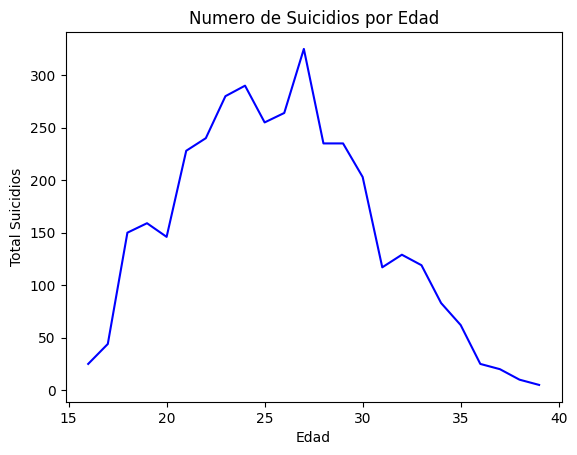

In [44]:
# Grafico de Cantidad de Suicidios por Edad
sns.lineplot(data=df_suicidios_edad, y="Total Suicidios", x="Edad", c="blue")
plt.title('Numero de Suicidios por Edad')

####Conclusiones



*   En el gráfico de cantidad de suicidios en base a la edad, se observa que hay un pico de casos entre los 25 y 27 años, luego esto va en descenso

####Recomendaciones
*   Realizar campañas y estrategias en las cuales se promueva la educacion y apoyo en las edades donde mas se necesita ayuda y tomar conciencia

###Analisis Univariado

In [45]:
# Obteniendo estadísticos descriptivos
stats.describe(df_suicidios_edad["Total Suicidios"])

DescribeResult(nobs=24, minmax=(5, 325), mean=152.04166666666666, variance=10318.302536231884, skewness=-0.003263750546676914, kurtosis=-1.3310743958761362)

In [46]:
# Calculando media geométrica
stats.gmean(df_suicidios_edad["Total Suicidios"])

99.84975031499147

In [47]:
# Calculando la media recortada
stats.trim_mean(df_suicidios_edad["Total Suicidios"], 0.1)

150.95

In [48]:
# Calculando coeficiente de variación
stats.variation(df_suicidios_edad["Total Suicidios"])

0.6540332145726859

In [49]:
# Calculando rango interquartil
stats.iqr(df_suicidios_edad["Total Suicidios"])

178.75

In [50]:
# Calculando asimetría
stats.skew(df_suicidios_edad["Total Suicidios"])

-0.003263750546676914

In [51]:
# Calculando la kurtosis
stats.kurtosis(df_suicidios_edad["Total Suicidios"])

-1.3310743958761362

<ipython-input-52-ad7a7e576aa0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_suicidios_edad["Total Suicidios"], kde=True, bins=10, color='blue')


<Axes: xlabel='Total Suicidios', ylabel='Density'>

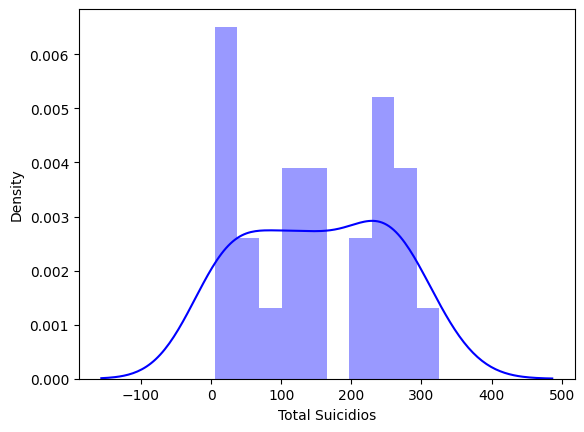

In [52]:
# Graficando distribución de la variable
sns.distplot(df_suicidios_edad["Total Suicidios"], kde=True, bins=10, color='blue')

--------------------------------------------------------------------------------

###Analisis Bivariado

In [53]:
# Realizando perfilamiento del dataset
ProfileReport(df_suicidios, title="Profiling Report")

Output hidden; open in https://colab.research.google.com to view.

<ipython-input-54-40637021f6f6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_suicidios_corr = df_suicidios.corr()


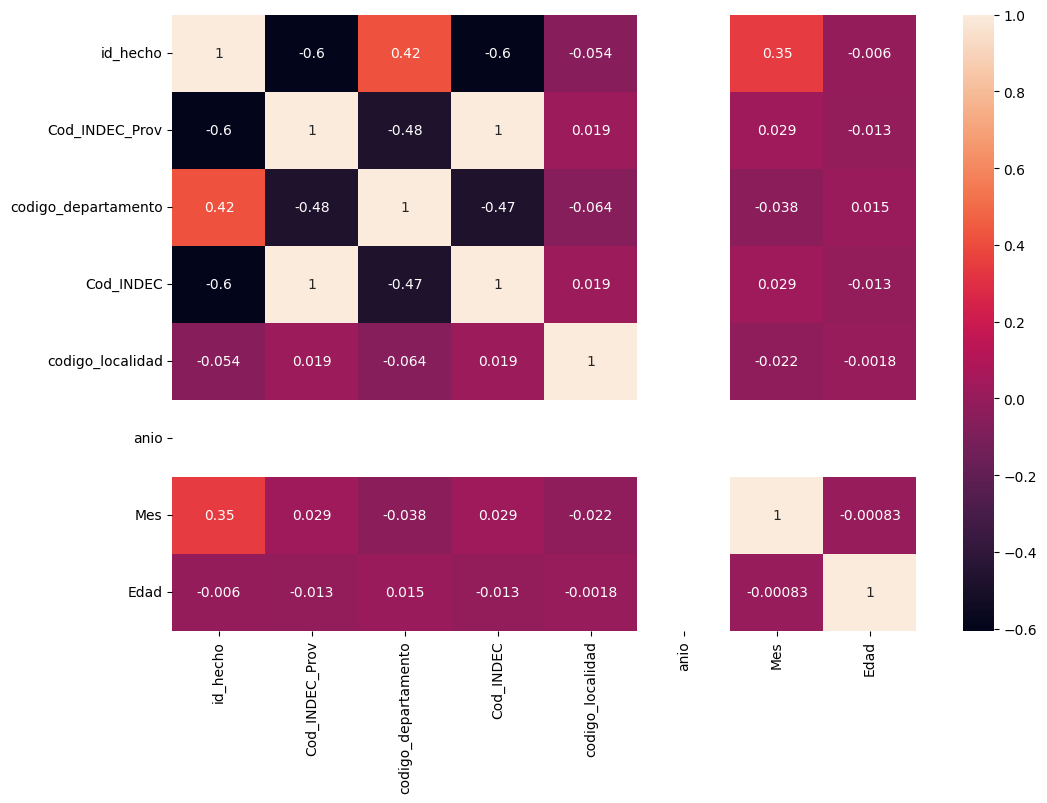

In [54]:
#Correlaciones
plt.figure(figsize=(12, 8))

df_suicidios_corr = df_suicidios.corr()
sns.heatmap(df_suicidios_corr,
            xticklabels = df_suicidios_corr.columns.values,
            yticklabels = df_suicidios_corr.columns.values,
            annot = True);

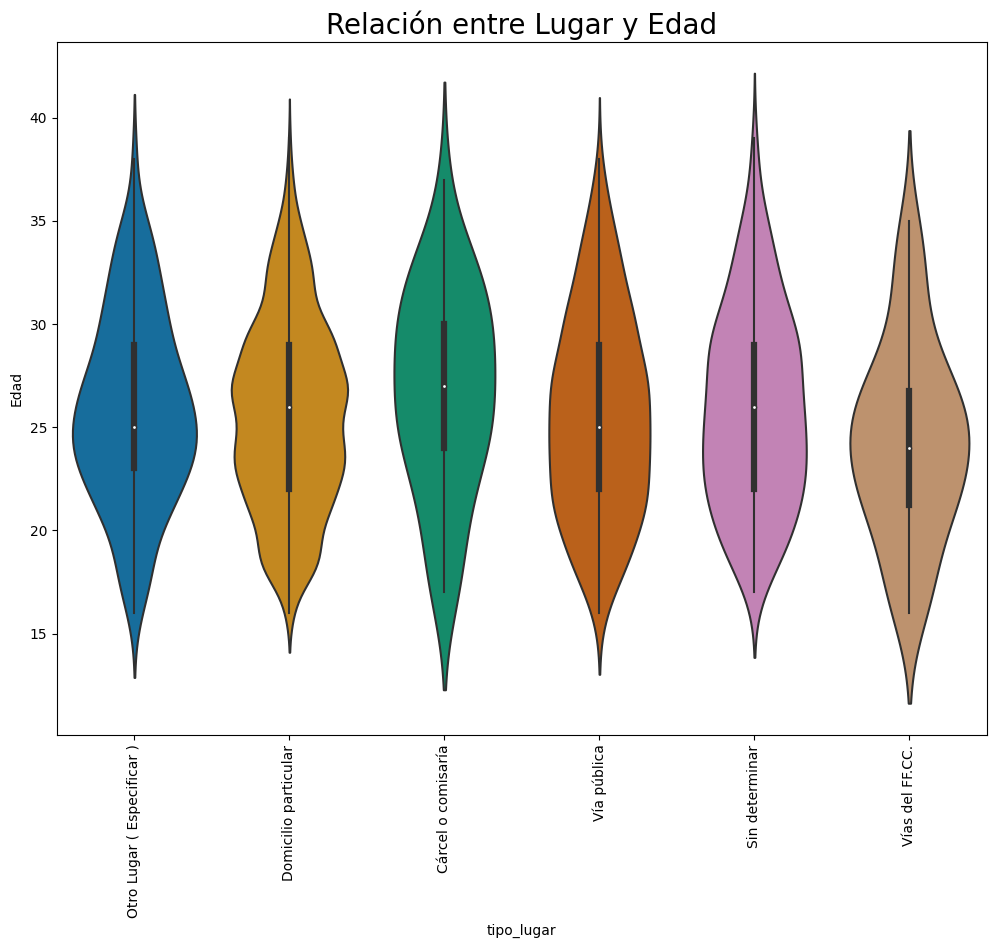

In [55]:
# Lugar vs Edad
plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(x=df_suicidios['tipo_lugar'], y=df_suicidios['Edad'], palette='colorblind')
plt.title('Relación entre Lugar y Edad', fontsize=20)
plt.xticks(rotation=90)
plt.show()


*   Se puede observar que comunmente las personas mas jovenes se suicidan en lugares de poca concurrencia publica como vias del tren, en cambio los mayores realizan el hecho en una carcel o comisaria

Text(0.5, 1.0, 'Relacion entre Edad y Modalidad')

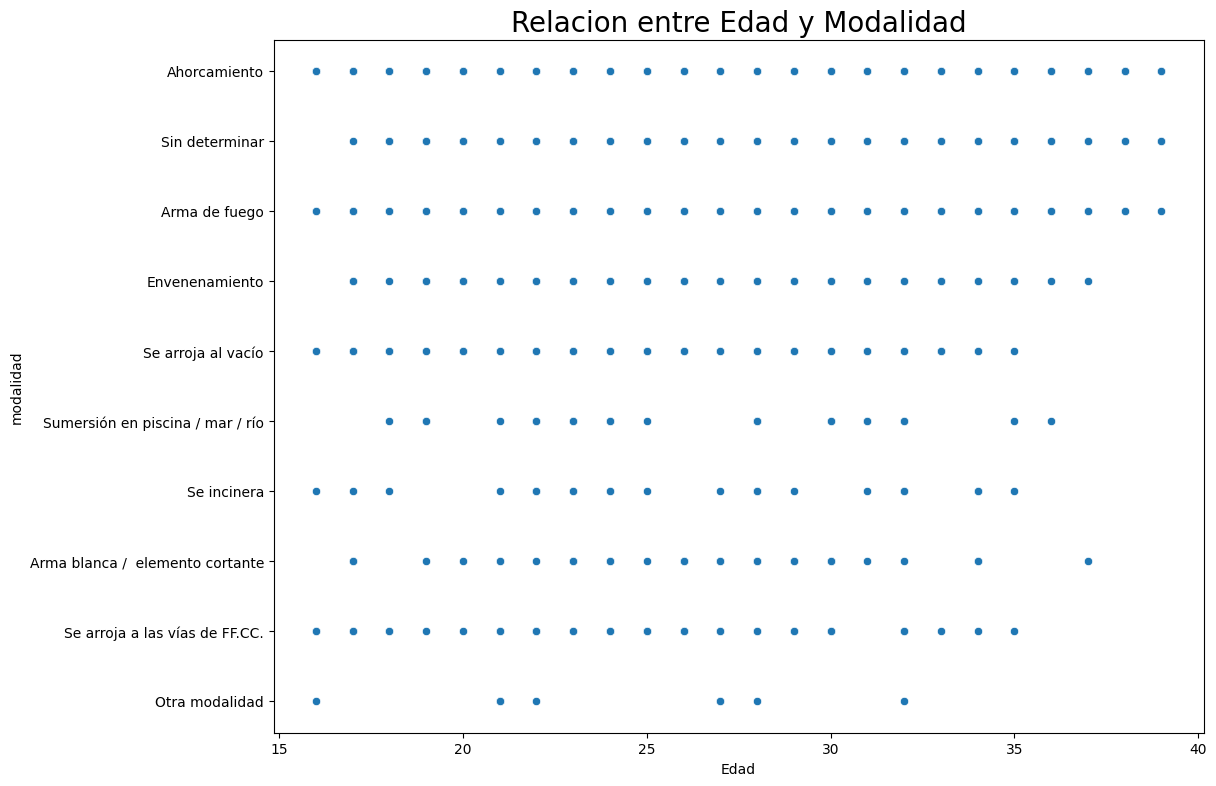

In [56]:
# Edad vs Modalidad
sns.scatterplot(x="Edad", y="modalidad", data=df_suicidios)
plt.title('Relacion entre Edad y Modalidad', fontsize = 20, fontweight = 30)

*   Podemos observar que la mayoria de los suicidios se producen en la mediana edad entre los 23 y 28 años. Las modalidades que mas se repiten son "ahorcamiento" y "arma de fuego", ya que en las dos hay hechos de muerte en todas las edades.

### Segunda Ronda de Feature Engineering

*   Naturaleza del dataset: El conjunto de datos que estoy utilizando es completo y ya contiene todas las variables relevantes para el análisis. No hay ninguna otra que tenga una relación significativa con la pregunta de investigación o que aporte valor adicional al análisis.

*   Objetivo de la investigación: La investigación tiene un objetivo específico y he considerado cuidadosamente las variables necesarias para abordar la pregunta.

*   Relevancia y calidad de los datos: He evaluado la calidad de los datos del dataset y la adición de variables adicionales podría aumentar la complejidad del análisis sin necesariamente mejorar la calidad de los resultados.

*   Metodología de investigación: Las variables seleccionadas son las más apropiadas para responder a la pregunta de investigación.

###Variables de Interes:



*   id_hecho

*   provincia

*   departamento

*   localidad

*   anio

*   mes

*   tipo_lugar

*   modalidad

*   motivo_origen_registro

*   sexo_suicida

*   tr_edad_suicida

Las variables eliminadas no son importantes ni se tendran en cuenta para el modelo ya que no son de utilidad

In [57]:
df_suicidios_var_import = df_suicidios.drop(['federal', 'Cod_INDEC_Prov', 'codigo_departamento', 'Cod_INDEC', 'codigo_localidad', 'fecha_hecho', 'hora_hecho'], axis=1)
df_suicidios_var_import = df_suicidios_var_import.rename(columns={'id_hecho': 'IdSuicidio',
                                                                  'provincia': 'Provincia',
                                                                  'departamento': 'Departamento',
                                                                  'localidad': 'Localidad',
                                                                  'anio': 'Año',
                                                                  'hora_hecho': 'Hora',
                                                                  'tipo_lugar': 'Lugar',
                                                                  'modalidad': 'Modalidad'})
df_suicidios_var_import

,IdSuicidio,Provincia,Departamento,Localidad,Año,Mes,Lugar,Modalidad,Motivo del Registro,Sexo,Edad
0,24971,MISIONES,Iguazú,Puerto Iguazú,2021,1,Otro Lugar ( Especificar ),Ahorcamiento,Intervención policial,Masculino,33
1,25004,MISIONES,Iguazú,Puerto Iguazú,2021,1,Domicilio particular,Ahorcamiento,Intervención policial,Masculino,27
2,25014,MISIONES,Libertador Grl. San Martín,Puerto Rico,2021,1,Domicilio particular,Sin determinar,Intervención policial,Masculino,32
3,25051,MENDOZA,Junín,La Colonia,2021,1,Domicilio particular,Ahorcamiento,Denuncia particular,Femenino,23
4,25052,MENDOZA,Godoy Cruz,Godoy Cruz,2021,1,Domicilio particular,Ahorcamiento,Denuncia particular,Femenino,29
...,...,...,...,...,...,...,...,...,...,...,...
3644,33403,CIUDAD DE BUENOS AIRES,Comuna 12,Ciudad de Buenos Aires,2021,6,Otro Lugar ( Especificar ),Ahorcamiento,Intervención policial,Masculino,25
3645,33202,CIUDAD DE BUENOS AIRES,Comuna 12,Ciudad de Buenos Aires,2021,8,Domicilio particular,Se arroja al vacío,Intervención policial,Femenino,26
3646,33509,BUENOS AIRES,General Pueyrredón,Mar del Plata,2021,7,Vía pública,Otra modalidad,Intervención policial,Masculino,21
3647,33510,BUENOS AIRES,Tandil,Tandil,2021,7,Domicilio particular,Ahorcamiento,Denuncia particular,Masculino,22


###Variable Objetivo

La variable a predecir sera la de "modalidad", ya que queremos detectar el método o forma de suicidio, para justamente tener los respectivos cuidados o atenciones acordes hacia cada paciente; Como nuestra variable objetivo es categórica se trata de un problema de clasificación.

In [58]:
### ONE HOT ENCODING ###

#df_suicidios_var_import["provincia"].unique()
#df_suicidios_var_import["provincia"].value_counts()

# Seleccionar todas las columnas excepto 'Modalidad'
features = df_suicidios_var_import.drop('Modalidad', axis=1)

# Aplicar One-Hot Encoding a las variables categóricas
features_encoded = pd.get_dummies(features, columns=['Provincia', 'Departamento', 'Localidad','Lugar', 'Motivo del Registro', 'Sexo'], prefix=['Provincia', 'Departamento', 'Localidad', 'Lugar', 'Motivo', 'Sexo'])

# Concatenar las variables codificadas con el DataFrame original
df_encoded = pd.concat([features_encoded, df_suicidios_var_import[['Modalidad']]], axis=1)

# Mostrar el DataFrame resultante
df_encoded

IdSuicidio   Año  Mes  Edad  Provincia_BUENOS AIRES  \
0          24971  2021    1    33                       0   
1          25004  2021    1    27                       0   
2          25014  2021    1    32                       0   
3          25051  2021    1    23                       0   
4          25052  2021    1    29                       0   
...          ...   ...  ...   ...                     ...   
3644       33403  2021    6    25                       0   
3645       33202  2021    8    26                       0   
3646       33509  2021    7    21                       1   
3647       33510  2021    7    22                       1   
3648       31966  2021    8    32                       1   

      Provincia_CATAMARCA  Provincia_CHACO  Provincia_CHUBUT  \
0                       0                0                 0   
1                       0                0                 0   
2                       0                0                 0   
3                       0                0                 0   
4                       0                0                 0   
...                   ...              ...               ...   
3644                    0                0                 0   
3645                    0                0                 0   
3646                    0                0                 0   
3647                    0                0                 0   
3648                    0                0                 0   

      Provincia_CIUDAD DE BUENOS AIRES  Provincia_CORDOBA  \
0                                    0                  0   
1                                    0                  0   
2                                    0                  0   
3                                    0                  0   
4                                    0                  0   
...                                ...                ...   
3644                                 1                  0   
3645                                 1                  0   
3646                                 0                  0   
3647                                 0                  0   
3648                                 0                  0   

      Provincia_CORRIENTES  Provincia_ENTRE RIOS  Provincia_FORMOSA  \
0                        0                     0                  0   
1                        0                     0                  0   
2                        0                     0                  0   
3                        0                     0                  0   
4                        0                     0                  0   
...                    ...                   ...                ...   
3644                     0                     0                  0   
3645                     0                     0                  0   
3646                     0                     0                  0   
3647                     0                     0                  0   
3648                     0                     0                  0   

      Provincia_JUJUY  Provincia_LA PAMPA  Provincia_LA RIOJA  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
...               ...                 ...                 ...   
3644                0                   0                   0   
3645                0                   0                   0   
3646                0                   0                   0   
3647                0                   0                   0   
3648                0                   0                   0   

      Provincia_MENDOZA  Provincia_MISIONES  Provincia_NEUQUEN  \
0                     0                   1                  0   
1    

###Algoritmo de Clasificacion para entrenar los datos

In [70]:
# X contiene las características (todas las columnas excepto la variable objetivo)
# y contiene la variable objetivo "Modalidad"
X = df_encoded.drop('Modalidad', axis=1)
y = df_encoded['Modalidad']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento X:", X_train.shape)
print("Dimensiones del conjunto de prueba X:", X_test.shape)
print("Dimensiones del conjunto de entrenamiento y:", y_train.shape)
print("Dimensiones del conjunto de prueba y:", y_test.shape)

Dimensiones del conjunto de entrenamiento X: (2919, 1205)
Dimensiones del conjunto de prueba X: (730, 1205)
Dimensiones del conjunto de entrenamiento y: (2919,)
Dimensiones del conjunto de prueba y: (730,)


In [71]:
# Crear modelos
rf_classifier = RandomForestClassifier(random_state=42)
gb_classifier = GradientBoostingClassifier(random_state=42)

# Realizar validación cruzada con RandomForestClassifier
rf_scores = cross_val_score(rf_classifier, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Accuracy con RandomForestClassifier:", rf_scores.mean())

# Realizar validación cruzada con GradientBoostingClassifier
gb_scores = cross_val_score(gb_classifier, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("Accuracy con GradientBoostingClassifier:", gb_scores.mean())

Accuracy con RandomForestClassifier: 0.4844380555085781
Accuracy con GradientBoostingClassifier: 0.30220906853073265


--------------------------------------------------------------------------------

###Metrica para validar el modelo

Elegi o priorice la metrica de Accuracy porque es la que mejor se adapta a la naturaleza del problema:

*   Equilibrio de clases

*   Costo uniforme de errores

*   Interés en la clasificación general correcta

*   Facilidad de interpretación

*   Comparación con otros modelos

--------------------------------------------------------------------------------

In [73]:
### Definiendo y entrenando modelo de RandomForestClassifier ###

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
### Generando predicciones con el modelo entrenado ###

preds_test = model.predict(X_test)

In [75]:
preds_test

array(['Ahorcamiento', 'Se arroja al vacío', 'Sin determinar',
       'Sin determinar', 'Arma de fuego', 'Arma de fuego', 'Ahorcamiento',
       'Se arroja al vacío', 'Ahorcamiento', 'Ahorcamiento',
       'Se arroja a las vías de FF.CC.', 'Ahorcamiento', 'Ahorcamiento',
       'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento', 'Arma de fuego',
       'Ahorcamiento', 'Ahorcamiento', 'Arma de fuego', 'Ahorcamiento',
       'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento', 'Arma de fuego',
       'Ahorcamiento', 'Ahorcamiento', 'Sin determinar', 'Ahorcamiento',
       'Ahorcamiento', 'Ahorcamiento', 'Sin determinar', 'Arma de fuego',
       'Ahorcamiento', 'Ahorcamiento', 'Se incinera', 'Ahorcamiento',
       'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento', 'Arma de fuego',
       'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento',
       'Ahorcamiento', 'Sin determinar', 'Ahorcamiento', 'Ahorcamiento',
       'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento', 'Ahorcamiento',
       '

In [76]:
# Calculando métrica: Accuracy
accuracy_score(y_test, preds_test)

0.7150684931506849

--------------------------------------------------------------------------------

###Optimizacion de Hiperparametros

In [72]:
# Crear un clasificador de bosque aleatorio
rf_classifier = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a ajustar y sus posibles valores
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=StratifiedKFold(n_splits=5), verbose=2, n_jobs=-1)

# Entrenar el modelo con la búsqueda en cuadrícula en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Realizar predicciones en el conjunto de prueba utilizando el mejor modelo encontrado
y_pred = grid_search.best_estimator_.predict(X_test)

# Calcular la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba con mejores hiperparámetros:", accuracy)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Precisión en el conjunto de prueba con mejores hiperparámetros: 0.7410958904109589


--------------------------------------------------------------------------------

###Conclusiones Obtenidas

* Rendimiento Aceptable: Un porcentaje de precisión del 70% indica un rendimiento aceptable para el modelo. Esto significa que el modelo es capaz de predecir correctamente el resultado en aproximadamente el 70% de las instancias evaluadas.

* Variedad de Aplicaciones: Dependiendo del dominio y la naturaleza del problema, un rendimiento del 70% puede ser considerado satisfactorio. En este caso lo es, ya que es un problema destinado a la salud.

* Optimización Posible: Aunque un rendimiento del 70% es aceptable, es importante explorar oportunidades para mejorar el modelo. La optimización podría incluir mas ajustes de hiperparámetros o selección de características más relevantes que podrían tener un mejor rendimiento en el problema específico.

Por lo tanto, un rendimiento del 70% es un punto de partida sólido, pero siempre se debe seguir refinando y mejorando el modelo para asegurar que cumpla con los requisitos especificados y las expectativas del usuario.